- 붓꽃 품종 분류 54
- 와인 품질 분류 59
- 타이타닉 생존자 분석 64
- 신용카드 사기거래 분류 71 ``
- cancer 데이터 78 ``
- bmi 분류 84
- 놀이기구 만족도 92
- 동물 분류 예측 100 ``
- 자동차 종류 분류 106
- 콘크리트 강도 예측 112
- 고객이탈 예측 119
- 심장병 예측 125
- 당뇨병 예측 131 ``
-----------
로지스틱 회귀 모형의 활용 137

---

In [2]:
#붓꽃 품종 종류
#붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='/Library/Fonts/Arial Unicode.ttf').get_name()
rc('font', family=font_name)

In [5]:
df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/iris.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
#품종을 기준으로 한 평균값들
df.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


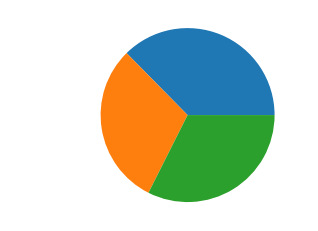

In [21]:
#파이차트
sums_by_species = df.groupby('Species').sum()
var = 'Sepal.Width'
sums_by_species[var].plot(kind='pie',fontsize=20)
plt.ylabel(var,horizontalalignment='left')
plt.rcParams.update({'text.color':'white','axes.labelcolor':'white'})
plt.savefig('iris_pie.png')

            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          329.4        148.7         277.6        101.3


<AxesSubplot:xlabel='Species'>

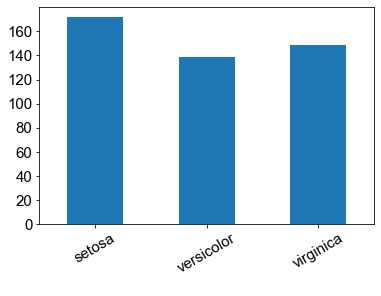

In [22]:
#품종별 변수 합계
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)
var = 'Sepal.Width'
#rot 글자회전(rotation)
#꽃받침 너비 기준 분류 그래프
sums_by_species[var].plot(kind='bar',fontsize=15, rot=30)

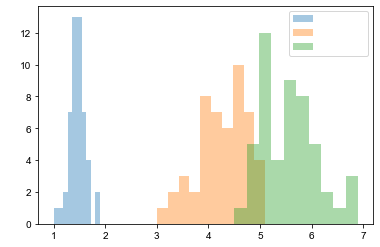

In [24]:
#품종별 꽃잎 길이
for spec in df['Species'].unique():
    subdf = df[df['Species']==spec]
    subdf['Petal.Length'].plot(kind='hist', alpha=0.4, label=spec)

plt.legend(loc='upper right')

In [25]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica')

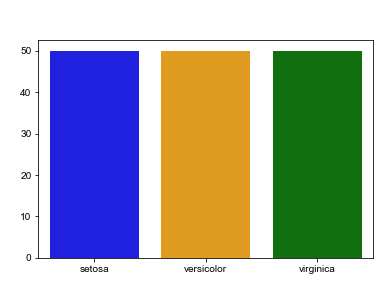

In [26]:
import seaborn as sns
colors = ['blue','orange','green']

sns.countplot('Species',data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica', fontsize=14)

In [27]:
cols=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
X = df[cols]
y = df['Species']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
print('학습용:',model.score(X_train,y_train))
print('검증용:',model.score(X_test,y_test))

학습용: 0.9666666666666667
검증용: 1.0


In [30]:
#confusion matrix(혼동행렬,오분류표) 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test,pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [31]:
df_cm = pd.DataFrame(cm, index=[0,1,2], columns=[0,1,2])
df_cm

,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


<AxesSubplot:title={'center':'Confusion Matrix'}>

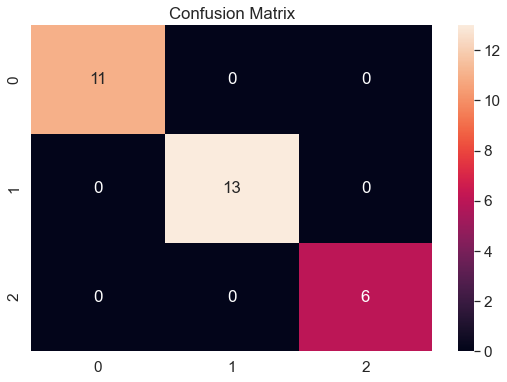

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm,annot=True)
#색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [33]:
#df.target.unique()
#df 다름 ㅠ

AttributeError: 'DataFrame' object has no attribute 'target'